# Lista de exercicio 1

### Q1 - Gerador RANDU
#### Criar uma funcão para Gerador RANDU em R


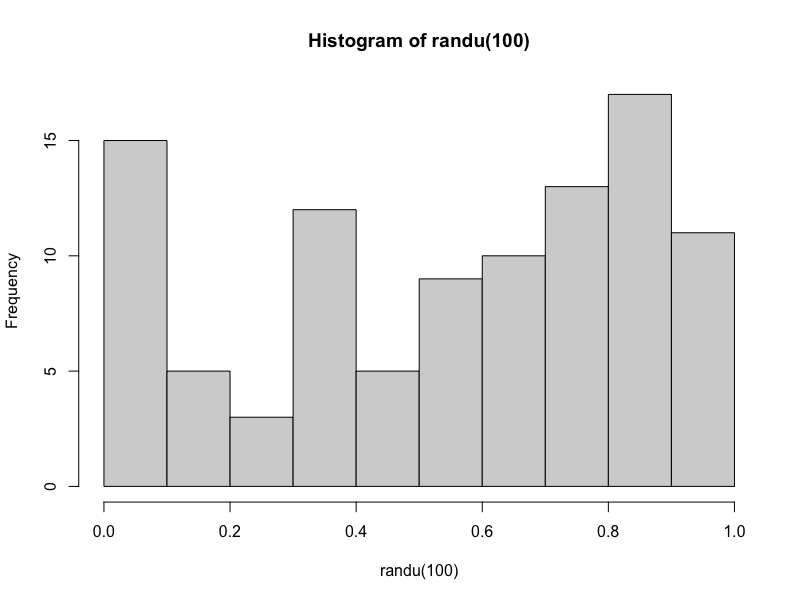

In [29]:
randu <- function(n, seed = 1, modulo = 2^31) {
  x <- seed
  u <- numeric(n) 
  for (i in 1:n) {
    x <- (65539 * x) %% modulo
    u[i] <- x / modulo
  }
  return(u)
}

randu(100) |> hist()

### Q2 - Gerador Aleatorio - sequencia

In [30]:
gerador_seq <- function(n) {
  x <- numeric(n)  
  x[1] <- 23
  x[2] <- 66
  
  for (i in 3:n) {
    x[i] <- (3 * x[i - 1] + 5 * x[i - 2]) %% 100
  }
  
  u <- x / 100
  
  list(xn = x, un = u)
}

In [31]:
n <- 14
resultado <- gerador_seq(n)
resultado$xn

 [1] 23 66 13 69 72 61 43 34 17 21 48 49 87  6

### Q3 - Função de probabilidade
> Usando a função inversa temos:

In [32]:
F_x <- function() {
  repeat {
    u <- runif(1)
    if (u <= 1/3) {
      return(1)
    } else {
      return(2)
    }
  }
}

#### a) n = 100

In [33]:
n = 100
resultado <- purrr::map_dbl(1:n, ~ F_x())
resultado |> janitor::tabyl()

 resultado  n percent
         1 33    0.33
         2 67    0.67

#### b) n = 1000

In [34]:
n = 1000
resultado <- purrr::map_dbl(1:n, ~ F_x())
resultado |> janitor::tabyl()

 resultado   n percent
         1 310    0.31
         2 690    0.69

#### c) n = 10000

In [35]:
n = 1000
resultado <- purrr::map_dbl(1:n, ~ F_x())
resultado |> janitor::tabyl()

 resultado   n percent
         1 332   0.332
         2 668   0.668

### Q4 - Se U ~ (0,1), então:

a) $1 - U => U(0,1)$

b) ${-1\over \lambda} log(U) => exp(\lambda)$

### Q5 - Gerar valores de uma distruibuição de laplace 

Aplicando a transformação temos
$$ f(x) $$ 

Se $x < a$, temos:
$$ f(x) $$ 

Se $x >= a$, temos:
$$ f(x) $$  

Assim: 
$$ F_x(x)^-1 =  $$ 

In [38]:
dist_laplace <- function(n = 1, a = 0, b = 1){
    U = runif(n)
    X <- ifelse(U <= 0.5, 
      a + b * log(2 * U), 
      a - b * log(2 * (1 - U)))
  return(X)
}

In [39]:
#install.packages('VGAM')

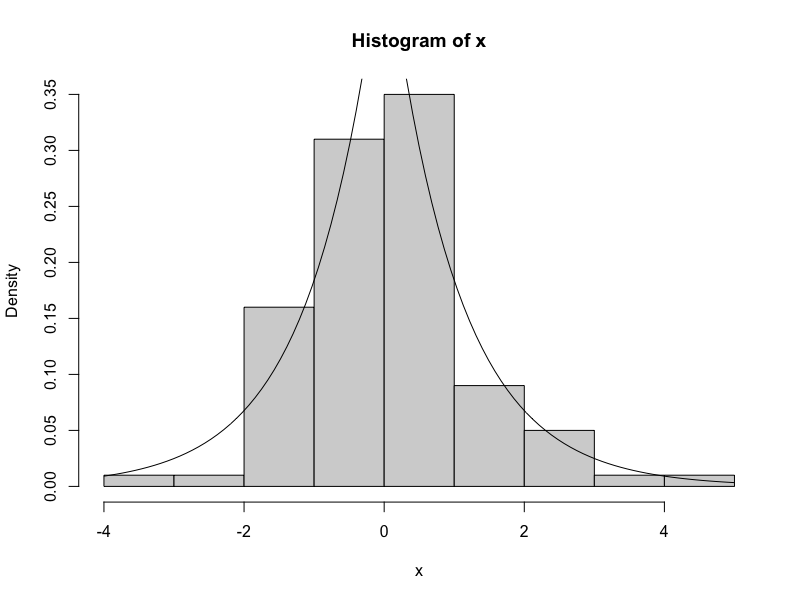

In [40]:
n = 100
a = 0
b = 1
x = dist_laplace(n = n, a = a, b = b)

hist(x, probability = TRUE)
curve(VGAM::dlaplace(x = x, location = a, scale = b), add = TRUE)


### Q6) Fotebol


#### a) Simular resultados dos jogos
$
\omega = \{derrota, empate, triunfo\}
$

In [41]:
F_x <- function(n) {
  resultado <- character(n)
  for (i in 1:n) {
  u <- runif(1)
  resultado[i] <- dplyr::case_when(
    u <= .2 ~ 'Derrota',
    u <= .5 ~ 'Empate',
    TRUE ~ 'Triunfo'
  )
  }
  return(resultado)
}

F_x(n=19) |> janitor::tabyl() |> print()

 F_x(n = 19) n   percent
     Derrota 3 0.1578947
      Empate 7 0.3684211
     Triunfo 9 0.4736842


#### b) Simulação de resultado

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   31.50   37.00   35.93   41.00   45.00 


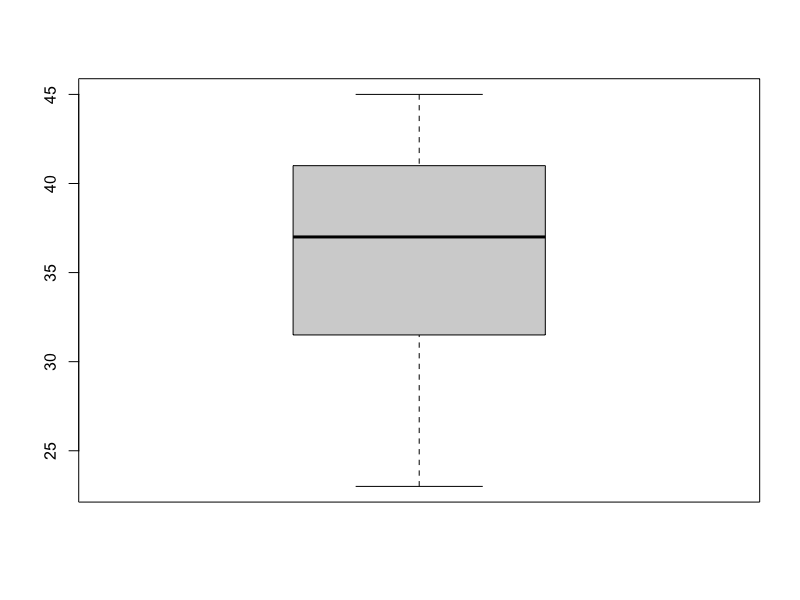

In [42]:
simular_campanha <- function(n_camp){
  resultado_camp <- numeric(n_camp)
  for(i in 1:n_camp) {
   resultado_camp[i] <- as.numeric(sum(table(F_x(n = 19))*c(0, 1, 3)))
  }
  return(resultado_camp)
  }

resultados = simular_campanha(n_camp = 15) 
summary(resultados) |> print()
resultados |> boxplot()

### Q7) 

$F(x) = {x^2 + x \over 2}, 0 <= x <= 1$

#### a) Metodo da tranformação inversa

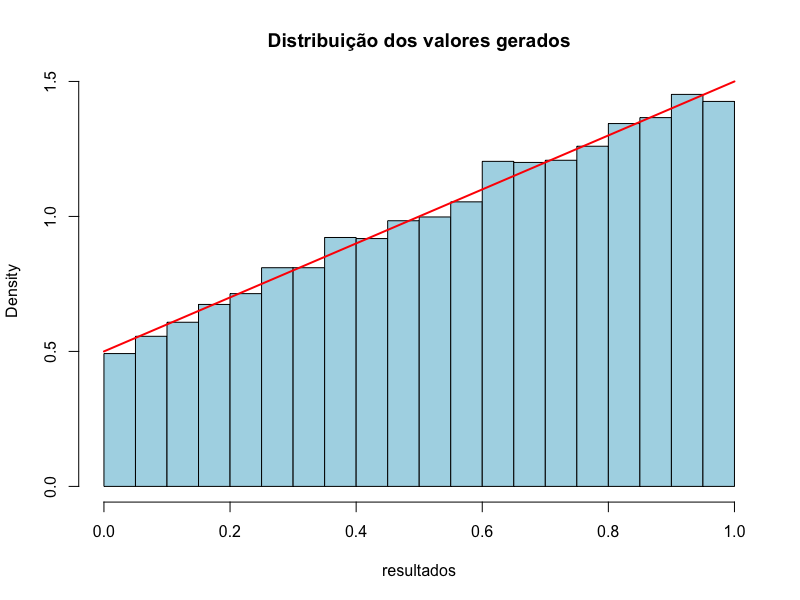

In [43]:
metodo_invesa <- function(n) {
  u <- runif(n)
  x <- (-1 + sqrt(1 + 8 * u)) / 2
  return(x)
}

n <- 10000
resultados <- metodo_invesa(n)

dF <- deriv(~ (x^2 + x)/2, "x")

hist(resultados, breaks = 30, probability = TRUE, 
     main = "Distribuição dos valores gerados", col = "lightblue")
curve((2 * x + 1)/2, from = 0, to = 1, add = TRUE, col = "red", lwd = 2)


In [44]:
dF <- deriv(~ (x^2 + x)/2, "x")

print(dF)

expression({
    .value <- (x^2 + x)/2
    .grad <- array(0, c(length(.value), 1L), list(NULL, c("x")))
    .grad[, "x"] <- (2 * x + 1)/2
    attr(.value, "gradient") <- .grad
    .value
})


#### b) Metodo da rejeição

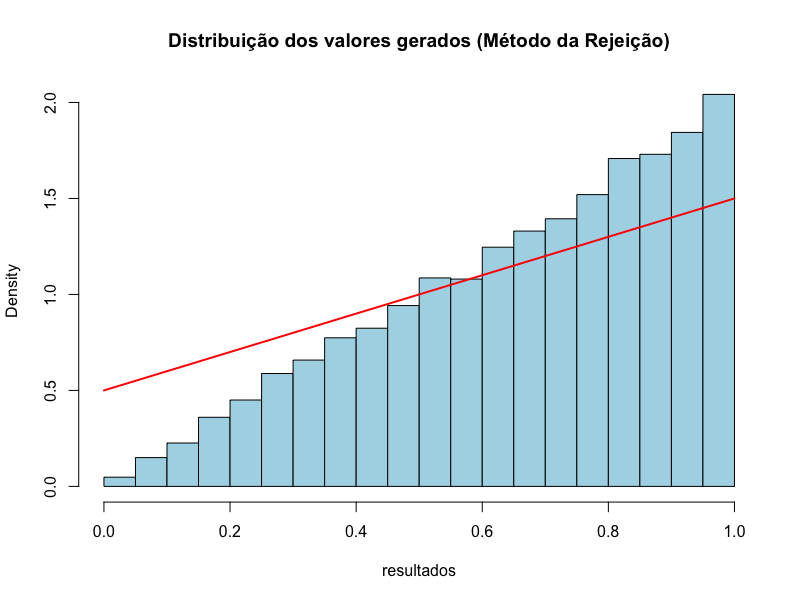

In [45]:
# Função de X
f_x <- function(x) {return(x)}

metodo_rejeicao <- function(n) {
  amostras <- c()
  
  while (length(amostras) < n) {
    x <- runif(1, min = 0, max = 1)
    u <- runif(1, min = 0, max = 1)
    
    if (u <= f_x(x)) {
      amostras <- c(amostras, x)
    }
  }
  
  return(amostras)
}

n <- 10000
resultados <- metodo_rejeicao(n)

hist(resultados, breaks = 30, probability = TRUE, 
     main = "Distribuição dos valores gerados (Método da Rejeição)", col = "lightblue")
curve((2 * x + 1)/2, from = 0, to = 1, add = TRUE, col = "red", lwd = 2)

#### Comparar os resultados

In [46]:
n <- 1000
amostra = runif(n, min = 0, max = 1)

F_x <- function(x) {return((x^2 + x) / 2)}

resultado_real = purrr::map_dbl(amostra, F_x)
resultado_metodo_inversa <- metodo_invesa(n)
resultado_metodo_rejeicao <- metodo_rejeicao(n)

mae_inversa <- mean(abs(resultado_real - resultado_metodo_inversa))
mae_rejeicao <- mean(abs(resultado_real - resultado_metodo_rejeicao))

cat("Para n =",n, "Temos: Erro Médio Absoluto (Inversa):", mae_inversa, "\n")
cat("Para n =",n, "Temos: Erro Médio Absoluto (Rejeição):", mae_rejeicao, "\n")


Para n = 1000 Temos: Erro Médio Absoluto (Inversa): 0.3522316 
Para n = 1000 Temos: Erro Médio Absoluto (Rejeição): 0.362258 


> Graficamente conseguimos ver que o metodo da inversa é melhor e quando analisamos o erro absoluto médio, vemos que o resultado no metodo invesa é menor.

### Q8)

$f(x) = 30(x^2 - 2x^3 + x^4), onde 0 <= x <= 1$

Olhando o gráfico da f(x), um bom candidato seria $x - x^2$

Usando o metodo da rejeição, temos: 


 Aceito Rejeito 
  0.168   0.832 


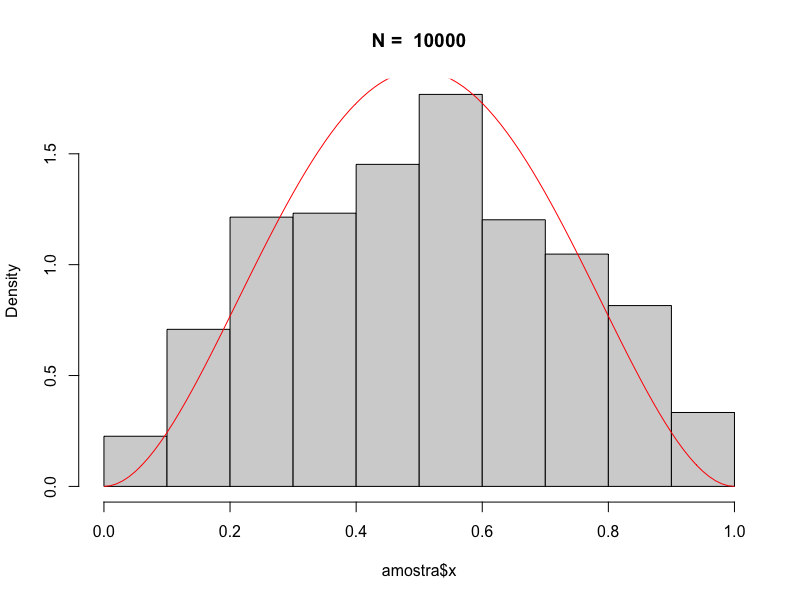

In [47]:
f_x <- function(x) {x - x^2} 

metodo_rejeicao <- function() {
  repeat {
    x <- runif(n = 1, min = 0, max = 1)
    u <- runif(n = 1, min = 0, max = 1)

    if (u <= f_x(x)) {
      return(list(x = x, contagem = "Aceito"))
    } else {
      return(list(x = NA, contagem = "Rejeito"))
    }
  }
}

n = 10000
metodo_rejeicao()
amostra <- purrr::map_df(1:n, ~metodo_rejeicao())  

amostra$contagem |>
  table() |>
  prop.table() |>
  print()

amostra$x |> hist(probability = TRUE, main = paste("N = ", n))
curve(30*(x^2 - 2*x^3 + x^4), from = 0, to = 1, col = "red", lwd = 1, add = TRUE)


> Com uma taxa de aceitação de 15,5%, temos uma baixa eficiencia no metodo para esse caso.

### Q9)

Usando o metodo da inversa. 

1. Encontrar a acumulada de Y, dado que $Y = X^{(1/a)}$   
$ F_y(y) = P(Y <= y) = P(X^{(1/a)} = y) $  
$P({(X^{1/a}})^a <= y^a) <=> P(X <= y^a) $  

2. Sabendo que $F_x(x) = 1 - e^{-x}$, temos:   
$ F_Y(y) = 1 - e^{-(y^a)} $  

3. Encontar a inversa:   
$ U = 1 - e^{-(y^a)} $  
$ U - 1= -e^{-(y^a)}  (-1) $  
$ 1 - U = e^{-(y^a)}  (log)$  
$ log(1 - U) = -y^a (-1) $  
$ y^a = -log(1 - U) $  
$ y = {(-log(1 - u))}^{1/a} $

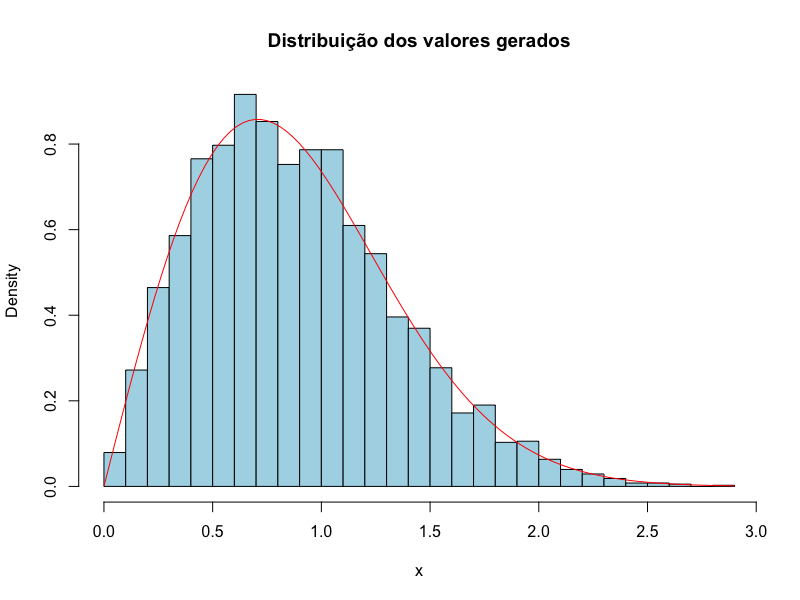

In [48]:
metodo_invesa <- function(n, a) {
  u <- runif(n)
  x <- (-1 - log(1 - u))^(1/a) 
  return(x)
}

n <- 10000
a <- 2
x <- metodo_invesa(n, a)


hist(x, breaks = 30, probability = TRUE, 
     main = "Distribuição dos valores gerados", col = "lightblue")

curve(dweibull(x, shape = a, scale = 1), from = 0, add = TRUE, col = 'red')


### Q10)

Prove que: 
> Se $U_1$ e $U_2$ são iid, então $X_1$ e $X_2$ também são

In [49]:
###

### Q11) 

In [56]:

dist.normal <- function(n) {
  
  gerar_valor <- function() {
    repeat {
      y1 <- rexp(1, rate = 1)
      y2 <- rexp(1, rate = 1)
      
      if (y2 > ((1 - y1)^2) / 2) {
        u <- runif(1, min = 0, max = 1)
        return(ifelse(u <= 0.5, y1, -y1))
      }
    }
  }
  
  x <- purrr::map_dbl(1:n, ~ gerar_valor())
  return(x)
}


[1] "Box-Muller: exp(1): 0.86384391784668s"


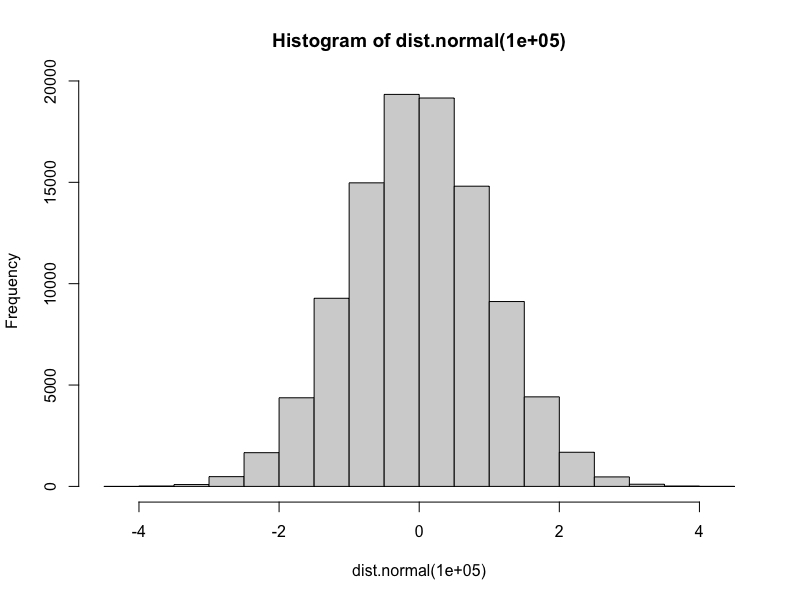

In [76]:
n <- 10000
inicio_M1 <- Sys.time() 
dist.normal(100000) |> hist()
fim_M1  <- Sys.time()

print(paste0("Box-Muller: exp(1): ", fim_M1 - inicio_M1,"s"))

In [64]:
Sys.time() 

[1] "2025-01-16 19:30:10 -03"